In [10]:
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import networkx as nx
import osmnx as ox
import pandas as pd
from IPython.display import IFrame
%matplotlib inline
ox.__version__

'1.0.0'

You can configure OSMnx using `ox.config()`. See the [documentation](https://osmnx.readthedocs.io/en/stable/osmnx.html#osmnx.utils.config) for the settings you can configure. For example, by default OSMnx caches all server responses to prevent repeatedly hitting the server for the same query every time you run it. This both makes our code faster on subsequent runs and helps us be a \"good neighbor\" to the server. But you can turn caching off (or back on again) with the `use_cache` parameter. Any parameters not passed to the config function are (re-)set to their original default values whenever you call it. API responses can be cached locally so OSMnx doesn't have to request the same data from the API multiple times: saving bandwidth, increasing speed, and enabling reproducibility.

In [ ]:
# turn response caching on and turn on logging to your terminal window
ox.config(log_console=True, use_cache=True)

## 1. Query place boundaries

The `graph_from_place` function uses place boundary geocoding logic to find the network within your place's boundary. Let's look briefly at this place boundary querying before we get to street networks. You can download by cities, neighborhoods, boroughs, counties, states, or countries: anything with geocodable polygon boundaries in OSM's database. Notice the polygon geometries represent political boundaries, not physical/land boundaries. OSMnx will turn your geocoded place (or multiple places) boundaries into a geopandas GeoDataFrame.

In [49]:
# make query an unambiguous dict to help the geocoder find specifically what you're looking for
#note that when getting boundaries for cities, county must be passed 
places = [{#'city' : 'Merida',
           'county': 'Merida',
         'state' : 'Yucatan',
         'country' : 'Mexico'},
         {#'city' : 'Kanasin',
          'county': 'Kanasin',
         'state' : 'Yucatan',
         'country' : 'Mexico'}]

Get the boundary polygon for Merida and Kanasin county, project it, and plot it

In [50]:
city = ox.geocode_to_gdf(places)

In [51]:
city_proj = ox.project_gdf(city)

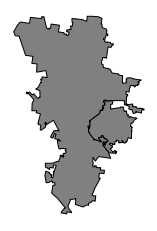

In [59]:
ax = city_proj.plot(facecolor='gray', edgecolor='black')
_ = ax.axis('off')

In [11]:
city

,geometry,bbox_north,bbox_south,bbox_east,bbox_west,place_id,osm_type,osm_id,lat,lon,display_name,class,type,importance
0,"POLYGON ((-89.72620 20.99887, -89.72609 20.995...",21.092045,20.873309,-89.530168,-89.726196,258846918,relation,6265959,20.967076,-89.623740,"Mérida, Yucatán, Mexico",boundary,administrative,0.621259
1,"POLYGON ((-89.59536 20.92989, -89.59535 20.929...",20.982075,20.904644,-89.534440,-89.595365,259335465,relation,6333674,20.935047,-89.557724,"Kanasín, Yucatán, 97370, Mexico",boundary,administrative,0.373581


In [4]:
# download and project a street network
G = ox.graph_from_place(places, network_type='drive')